# 课题一：基于协同过滤与内容推荐的电影推荐系统开发

## 第⼀阶段：数据探索与清洗

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt  
from datetime import datetime
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用适合的中文字体  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号 

# 读取文件  
file_path1 = 'data/movies.txt'
file_path2 = 'data/personalRatings.txt'
file_pathR1 = 'data/ratings/ratings_1.txt'
file_pathR2 = 'data/ratings/ratings_2.txt'
file_pathR3 = 'data/ratings/ratings_3.txt'
file_pathR4 = 'data/ratings/ratings_4.txt'
file_pathR5 = 'data/ratings/ratings_5.txt'
# 使用 '::' 作为分隔符
movie = pd.read_csv(file_path1, delimiter='::', header=None, names=['MovieID', 'Title', 'Genres'])  
personalRatings = pd.read_csv(file_path2, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_1 = pd.read_csv(file_pathR1, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_2 = pd.read_csv(file_pathR2, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_3 = pd.read_csv(file_pathR3, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_4 = pd.read_csv(file_pathR4, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_5 = pd.read_csv(file_pathR5, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
# 查看前几行数据
movie.head()



C:\Users\86158\AppData\Local\Temp\ipykernel_13976\2592277868.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie = pd.read_csv(file_path1, delimiter='::', header=None, names=['MovieID', 'Title', 'Genres'])
C:\Users\86158\AppData\Local\Temp\ipykernel_13976\2592277868.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  personalRatings = pd.read_csv(file_path2, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
C:\Users\86158\AppData\Local\Temp\ipykernel_13976\2592277868.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support r

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# 数据类型转化，确保 'Genres' 列是字符串类型
movie['Genres'] = movie['Genres'].astype(str)

In [4]:
# 去重
movie = movie.drop_duplicates()
# 检查缺失值
print(movie.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
movie = movie.dropna()
print(movie.shape)
movie.head()

MovieID    0
Title      0
Genres     0
dtype: int64
(3423, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# 去重
personalRatings = personalRatings.drop_duplicates()
# 检查缺失值
print(personalRatings.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
personalRatings = personalRatings.dropna()
personalRatings['Timestamp'] = pd.to_datetime(personalRatings['Timestamp'], unit='s')
personalRatings.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,1,3,3,2000-12-31 22:32:48
1,1,4,4,2000-12-31 22:04:35
2,1,5,5,2001-01-06 23:38:11
3,1,6,3,2000-12-31 22:37:48
4,1,7,5,2000-12-31 22:33:59


In [6]:
# 去重
ratings_1 = ratings_1.drop_duplicates()
# 检查缺失值
print(ratings_1.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
ratings_1 = ratings_1.dropna()
ratings_1['Timestamp'] = pd.to_datetime(ratings_1['Timestamp'], unit='s')
ratings_1.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,1,661,3,2000-12-31 22:35:09
1,1,914,3,2000-12-31 22:32:48
2,1,3408,4,2000-12-31 22:04:35
3,1,2355,5,2001-01-06 23:38:11
4,1,1197,3,2000-12-31 22:37:48


In [7]:
# 去重
ratings_2 = ratings_2.drop_duplicates()
# 检查缺失值
print(ratings_2.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
ratings_2 = ratings_2.dropna()
ratings_2['Timestamp'] = pd.to_datetime(ratings_2['Timestamp'], unit='s')
ratings_2.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,1229,34,4,2000-11-21 20:02:22
1,1229,531,5,2000-11-21 20:00:43
2,1229,80,3,2000-11-21 20:01:57
3,1229,2966,5,2000-11-21 20:02:22
4,1229,1233,4,2000-11-21 20:03:19


In [8]:
# 去重
ratings_3 = ratings_3.drop_duplicates()
# 检查缺失值
print(ratings_3.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
ratings_3 = ratings_3.dropna()
ratings_3['Timestamp'] = pd.to_datetime(ratings_3['Timestamp'], unit='s')
ratings_3.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,2380,150,5,2000-11-16 15:55:06
1,2380,153,3,2000-11-16 15:38:00
2,2380,3510,5,2001-01-01 14:59:47
3,2380,3513,4,2000-12-29 13:12:20
4,2380,2712,1,2000-11-16 16:04:39


In [9]:
# 去重
ratings_4 = ratings_4.drop_duplicates()
# 检查缺失值
print(ratings_4.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
ratings_4 = ratings_4.dropna()
ratings_4['Timestamp'] = pd.to_datetime(ratings_4['Timestamp'], unit='s')
ratings_4.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,3651,1252,5,2000-08-16 20:12:07
1,3651,587,4,2000-08-16 22:10:02
2,3651,589,4,2000-08-16 21:55:40
3,3651,2202,4,2000-08-16 20:51:55
4,3651,6,5,2000-08-16 22:00:59


In [10]:
# 去重
ratings_5 = ratings_5.drop_duplicates()
# 检查缺失值
print(ratings_5.isnull().sum())
# 处理缺失值（这里选择删除包含缺失值的行）
ratings_5 = ratings_5.dropna()
ratings_5['Timestamp'] = pd.to_datetime(ratings_5['Timestamp'], unit='s')
ratings_5.head()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,4791,2133,5,2000-11-15 13:14:29
1,4791,2134,3,2000-07-07 21:25:35
2,4791,665,2,2000-07-11 08:47:02
3,4791,2140,4,2000-07-07 21:22:10
4,4791,2155,3,2000-07-09 13:54:37


In [11]:
movie.shape


(3423, 3)

#### 统计用户评分分布、热门电影等并生成可视化图表

In [22]:
# 合并所有评分数据
all_ratings = pd.concat([personalRatings, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5])

# 统计用户评分分布
rating_counts = all_ratings['Rating'].value_counts().sort_index()

# 导入 pyecharts 相关模块
from pyecharts.charts import Bar
from pyecharts import options as opts

# 创建 Bar 图表对象
bar = Bar()

# 添加数据
bar.add_xaxis(rating_counts.index.tolist())
bar.add_yaxis("评分次数", rating_counts.values.tolist())

# 设置全局配置项
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="用户评分分布图"),
    xaxis_opts=opts.AxisOpts(name="评分"),
    yaxis_opts=opts.AxisOpts(name="评分次数"),
    visualmap_opts=opts.VisualMapOpts(max_=max(rating_counts.values))
)

# 渲染图表
bar.render_notebook()

C:\Users\86158\AppData\Local\Temp\ipykernel_13976\3175016621.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RatingCount', y='Title', data=top_movies, palette='viridis')


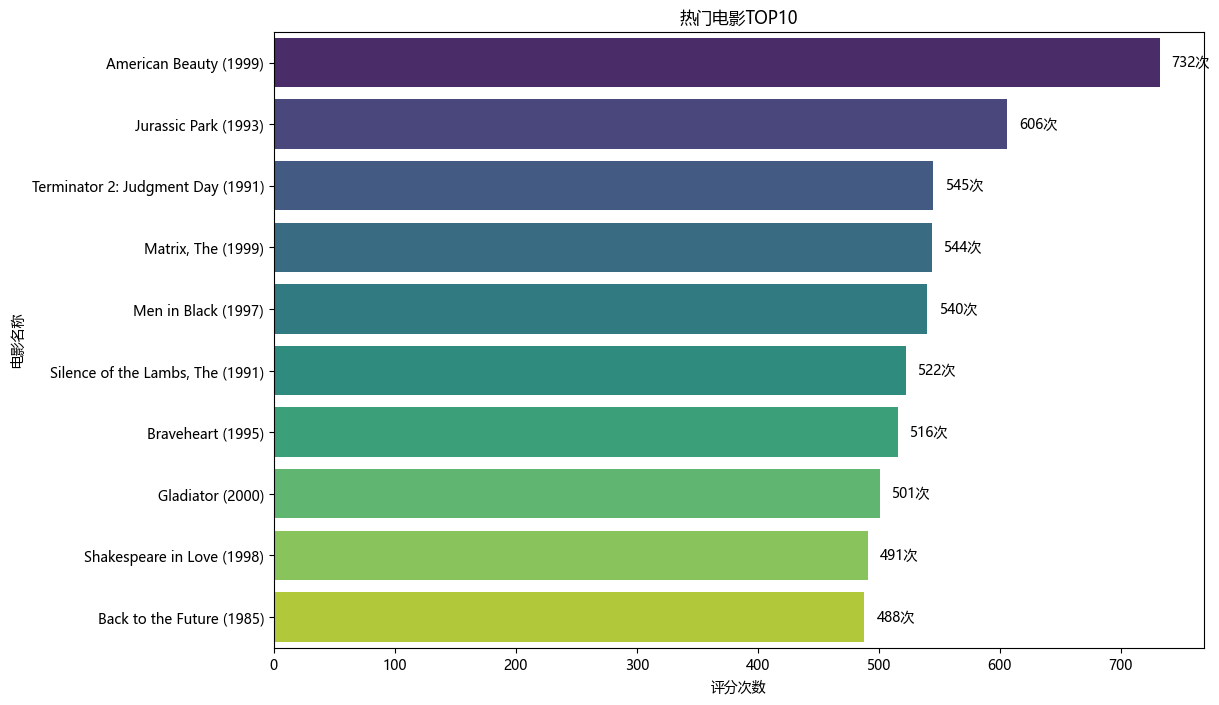

In [30]:
# 计算每部电影的评分次数
movie_ratings_count = ratings_1.groupby('MovieID')['Rating'].count().reset_index()
movie_ratings_count.columns = ['MovieID', 'RatingCount']

# 将评分次数合并到电影信息表中
movie_info = movie.merge(movie_ratings_count, on='MovieID')

# 找出评分次数最多的电影（例如前10部）
top_movies = movie_info.sort_values(by='RatingCount', ascending=False).head(10)

# 绘制热门电影图
plt.figure(figsize=(12, 8))
sns.barplot(x='RatingCount', y='Title', data=top_movies, palette='viridis')

# 添加评分次数的注释
for i, (index, row) in enumerate(top_movies.iterrows()):
    plt.text(row['RatingCount'] + 10, i, f"{row['RatingCount']}次", va='center')

plt.title('热门电影TOP10')
plt.xlabel('评分次数')
plt.ylabel('电影名称')
plt.show()

## 第⼆阶段：协同过滤推荐

In [14]:
# 合并所有评分数据
ratings = pd.concat([personalRatings, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5])

#### 实现基于⽤户的协同过滤算法

In [15]:
# 构建用户-电影评分矩阵
user_movie_matrix = ratings.pivot_table(index='UserID', columns='MovieID', values='Rating')

# 计算用户相似度（使用余弦相似度）
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# 定义一个函数来预测评分
def predict_rating(user_id, movie_id, user_similarity_df, user_movie_matrix):
    # 获取相似用户
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # 获取目标电影的评分
    movie_ratings = user_movie_matrix[movie_id]
    
    # 计算加权平均评分
    numerator = 0
    denominator = 0
    for similar_user_id, similarity in similar_users.items():
        if pd.notnull(movie_ratings[similar_user_id]):
            numerator += similarity * movie_ratings[similar_user_id]
            denominator += similarity
    
    if denominator == 0:
        return None
    else:
        return numerator / denominator

# 示例：预测用户输入的用户对电影的评分
user_id = int(input("请输入用户ID: "))
movie_id = int(input("请输入电影ID: "))

predicted_rating = predict_rating(user_id, movie_id, user_similarity_df, user_movie_matrix)
if predicted_rating is not None:
    print(f"预测用户{user_id}对电影{movie_id}的评分为: {predicted_rating}")
else:
    print(f"无法预测用户{user_id}对电影{movie_id}的评分，因为没有足够的相似用户评分数据。")

预测用户18对电影5的评分为: 3.001312934710891


#### 实现基于物品的协同过滤算法

In [16]:
# 构建用户-物品评分矩阵
ratings = pd.concat([personalRatings, ratings_1, ratings_2, ratings_3, ratings_4, ratings_5])
user_item_matrix = ratings.pivot_table(index='UserID', columns='MovieID', values='Rating')

# 计算物品相似度矩阵
item_similarity = cosine_similarity(user_item_matrix.T.fillna(0))
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# 生成推荐
def get_item_based_recommendations(user_id, user_item_matrix, item_similarity_df, top_n=5):
    # 获取用户已评分的物品
    user_ratings = user_item_matrix.loc[user_id].dropna()
    
    # 计算每个未评分物品的加权评分
    scores = pd.Series(0, index=user_item_matrix.columns)
    for item, rating in user_ratings.items():
        similar_items = item_similarity_df[item].drop(item)
        scores += similar_items * rating
    
    # 排除用户已评分的物品
    scores = scores.drop(user_ratings.index)
    
    # 返回评分最高的top_n个物品
    recommended_movie_ids = scores.nlargest(top_n).index
    recommended_movies = movie[movie['MovieID'].isin(recommended_movie_ids)][['MovieID', 'Title']]
    return recommended_movies

# 示例：为用户输入的用户ID推荐电影
user_id = int(input("请输入用户ID: "))
top_n = int(input("请输入推荐的电影数量: "))
print(f"为用户{user_id}推荐{top_n}部电影:")
recommendations = get_item_based_recommendations(user_id, user_item_matrix, item_similarity_df, top_n=top_n)
print(recommendations)

为用户18推荐5部电影:
      MovieID                       Title
428       480        Jurassic Park (1993)
1079     1270   Back to the Future (1985)
1833     2174          Beetlejuice (1988)
2042     2406  Romancing the Stone (1984)
2192     2571          Matrix, The (1999)


## 第三阶段：基于内容推荐

### 1.提取电影特征并构建特征向量

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# 1.提取电影特征并构建特征向量
# 预处理Genres列
movie['Genres'] = movie['Genres'].str.replace('|', ' ')

# 创建TF-IDF矩阵
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['Genres'])

# 计算余弦相似度
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



### 2.实现基于内容的推荐算法

In [18]:
# 定义函数获取推荐结果：实现基于内容的推荐算法
def get_recommendations(title, cosine_sim, movie, top_n=10):
    # 获取电影的索引
    indices = pd.Series(movie.index, index=movie['Title']).drop_duplicates()
    # 获取输入电影的索引
    if title not in indices:
        return f"电影 '{title}' 未找到。"
    idx = indices[title]
    # 计算该电影与其他电影的相似度得分
    sim_scores = list(enumerate(cosine_sim[idx]))
    # 按相似度得分排序
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # 取出前 top_n 个最相似的电影
    sim_scores = sim_scores[1:top_n+1]
    # 获取电影的索引
    movie_indices = [i[0] for i in sim_scores]
    # 返回推荐的电影
    recommended_movies = movie.loc[movie_indices][['MovieID', 'Title']]
    return recommended_movies

# 示例使用：用户输入电影名称和推荐数量 eg:Father of the Bride Part II (1995)
user_input = input("请输入电影名称（例如：'Father of the Bride Part II (1995)'）：")
top_n = int(input("请输入推荐的电影数量："))
print("基于内容的推荐结果:")
print("查询的电影是：", user_input)
print("推荐的电影数量是：", top_n)

recommended_movies = get_recommendations(user_input, cosine_sim, movie, top_n=top_n)

# 打印推荐结果
if isinstance(recommended_movies, str):
    print(recommended_movies)
else:
    for index, row in recommended_movies.iterrows():
        print(f"电影ID: {row['MovieID']}, 电影名称: {row['Title']}")

基于内容的推荐结果:
查询的电影是： Father of the Bride Part II (1995)
推荐的电影数量是： 5
电影ID: 19, 电影名称: Ace Ventura: When Nature Calls (1995)
电影ID: 38, 电影名称: It Takes Two (1995)
电影ID: 52, 电影名称: Mighty Aphrodite (1995)
电影ID: 63, 电影名称: Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
电影ID: 65, 电影名称: Bio-Dome (1996)


### 3.对⽐协同过滤和基于内容推荐的效果

In [19]:
# 对比协同过滤和基于内容推荐的效果
user_id = int(input("请输入用户ID: "))
top_n = int(input("请输入推荐的电影数量: "))
item_recommendations = get_item_based_recommendations(user_id, user_item_matrix, item_similarity_df, top_n=top_n)
print("协同过滤推荐结果:")
print("查询的用户ID为: ", user_id)
print("推荐的电影数量为: ", top_n)
print(item_recommendations)

协同过滤推荐结果:
查询的用户ID为:  5
推荐的电影数量为:  10
      MovieID                              Title
18         21                  Get Shorty (1995)
212       235                     Ed Wood (1994)
406       457               Fugitive, The (1993)
524       589  Terminator 2: Judgment Day (1991)
675       778               Trainspotting (1996)
946      1094            Crying Game, The (1992)
1074     1265               Groundhog Day (1993)
1387     1641             Full Monty, The (1997)
1421     1682            Truman Show, The (1998)
2032     2396         Shakespeare in Love (1998)


#### (1)评估协同过滤算法

In [20]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# 创建一个Reader对象，指定数据格式
reader = Reader(rating_scale=(1, 5))

# 将DataFrame转换为surprise可以使用的格式
data = Dataset.load_from_df(ratings_1[['UserID', 'MovieID', 'Rating']], reader)

# 选择一个协同过滤模型，这里以SVD为例
algo = SVD()

# 使用交叉验证评估模型
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# 打印评估结果
print("SVD Model Evaluation:")
print("RMSE:", results['test_rmse'])
print("MAE:", results['test_mae'])

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9128  0.9193  0.9145  0.9212  0.9137  0.9163  0.0033  
MAE (testset)     0.7194  0.7247  0.7211  0.7263  0.7214  0.7226  0.0025  
Fit time          1.47    1.48    1.57    1.56    1.58    1.53    0.05    
Test time         0.24    0.16    0.23    0.15    0.22    0.20    0.04    
SVD Model Evaluation:
RMSE: [0.91284318 0.9193171  0.91445768 0.92121396 0.91368868]
MAE: [0.71940431 0.72468286 0.72107116 0.72630015 0.72135593]
